<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Función alineamiento de un retardador </font>
</div>

Aquí se hace la función para obtener la posición del eje rápido

In [2]:
# MÓDULOS PARA IMPORTAR
from py_pol.jones_matrix import Jones_matrix, Jones_vector, degrees             # Cálculo Jones
from diffractio import degrees, mm, nm, um                                      # Diffractio
from diffractio import np, plt, sp                                              # Diffractio
from matplotlib.patches import Rectangle                                        # Rectangle

270


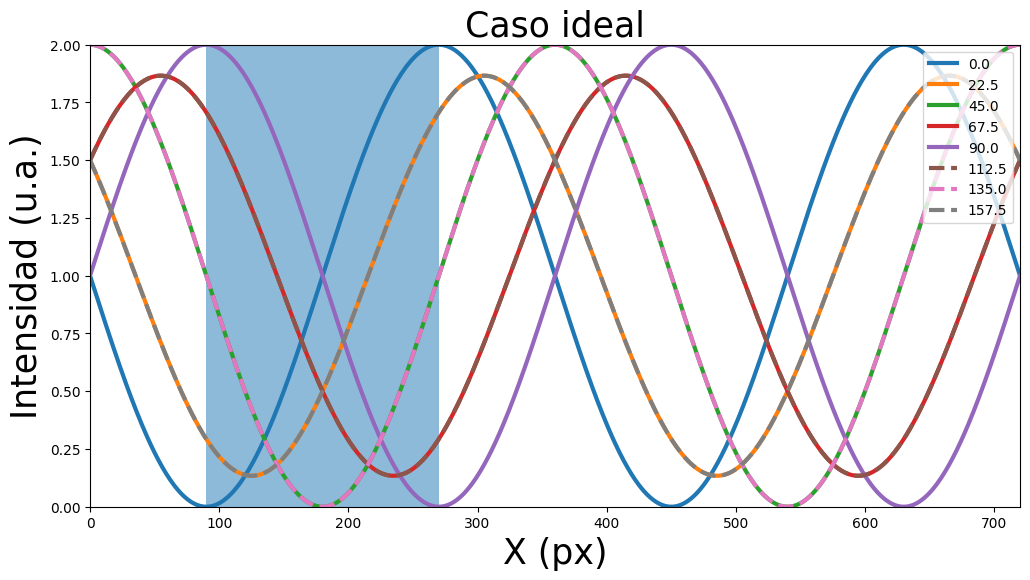

In [110]:
# Función para medir la posición del eje rápido de un retardador

Retarder_Alignment_dict = {

    "":,
    "":,
    "":,
    "":,
    "":,
    "":, 
}

def Retarder_Alignment(): 




    return 0



Nfases = 2
Nangles = 8
fase = np.linspace(0, Nfases * 360*degrees, Nfases * 360 + 1)
angles = np.linspace(0, 157.5*degrees, Nangles, endpoint=True)
Angles, Fase = np.meshgrid(angles, fase)
legend = np.round(angles / degrees, 1)

E1 = Jones_vector().linear_light(azimuth=90*degrees)
E2 = Jones_vector().linear_light(azimuth=0*degrees, global_phase=Fase)
E = E1 + E2
Q = Jones_matrix().retarder_linear(R=90*degrees, azimuth=Angles)
P = Jones_matrix().diattenuator_perfect(azimuth=45*degrees)
Efinal = P * Q * E

if Nangles <= 10:
    I = Efinal.parameters.intensity()
    plt.figure(figsize=(12,6))
    for ind in range(Nangles):
        ls = "-" if ind <= Nangles/2 else "--"
        plt.plot(I[:,ind], linestyle=ls, linewidth=3)
    plt.legend(legend, loc=1)

else:
    Efinal.parameters.azimuth_ellipticity(draw=True)
    I = Efinal.parameters.intensity(draw=True)
plt.title("Caso ideal", fontsize = 25)
plt.xlabel("X (px)", fontsize = 25)
plt.ylabel("Intensidad (u.a.)", fontsize = 25)
plt.ylim((0,2))
plt.xlim((0,720))

I0 = I[:,0]
If = I[:,4]
x_min = np.array(np.where(I0 == np.min(I0)))[0]
x_max = np.array(np.where(If == np.min(If)))[0][0]
print(x_max)
plt.gca().add_patch(Rectangle((x_min,0),x_max-x_min,2, alpha=0.5))

In [ ]:
for i in range (len(I[0,:])): 
    im_intensity = np.tile(I[:,i],(100,1))
    plt.figure()
    plt.imshow(im_intensity, cmap='Greys')
    plt.axis('off')
    plt.clim(0,2)
    #plt.savefig('Caso_0_{}.png'.format(i), bbox_inches='tight',pad_inches = 0)